# CNN
cnn uses kernel or filters to see the edges of the image using 3x3 matrix of [1 0 -1]3x3 called weights mostly

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from collections import Counter
from sklearn.metrics import classification_report

In [4]:
from keras.datasets import fashion_mnist

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [6]:
from keras.optimizers import Adam

In [7]:
(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()

In [8]:
X_train.shape

(60000, 28, 28)

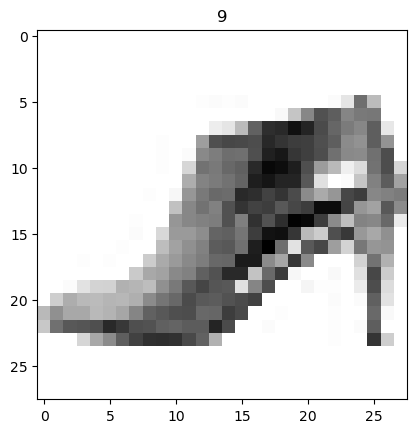

In [9]:
image_index = 4897
plt.title(y_train[image_index])
plt.imshow(X_train[image_index], plt.cm.binary)
plt.show()

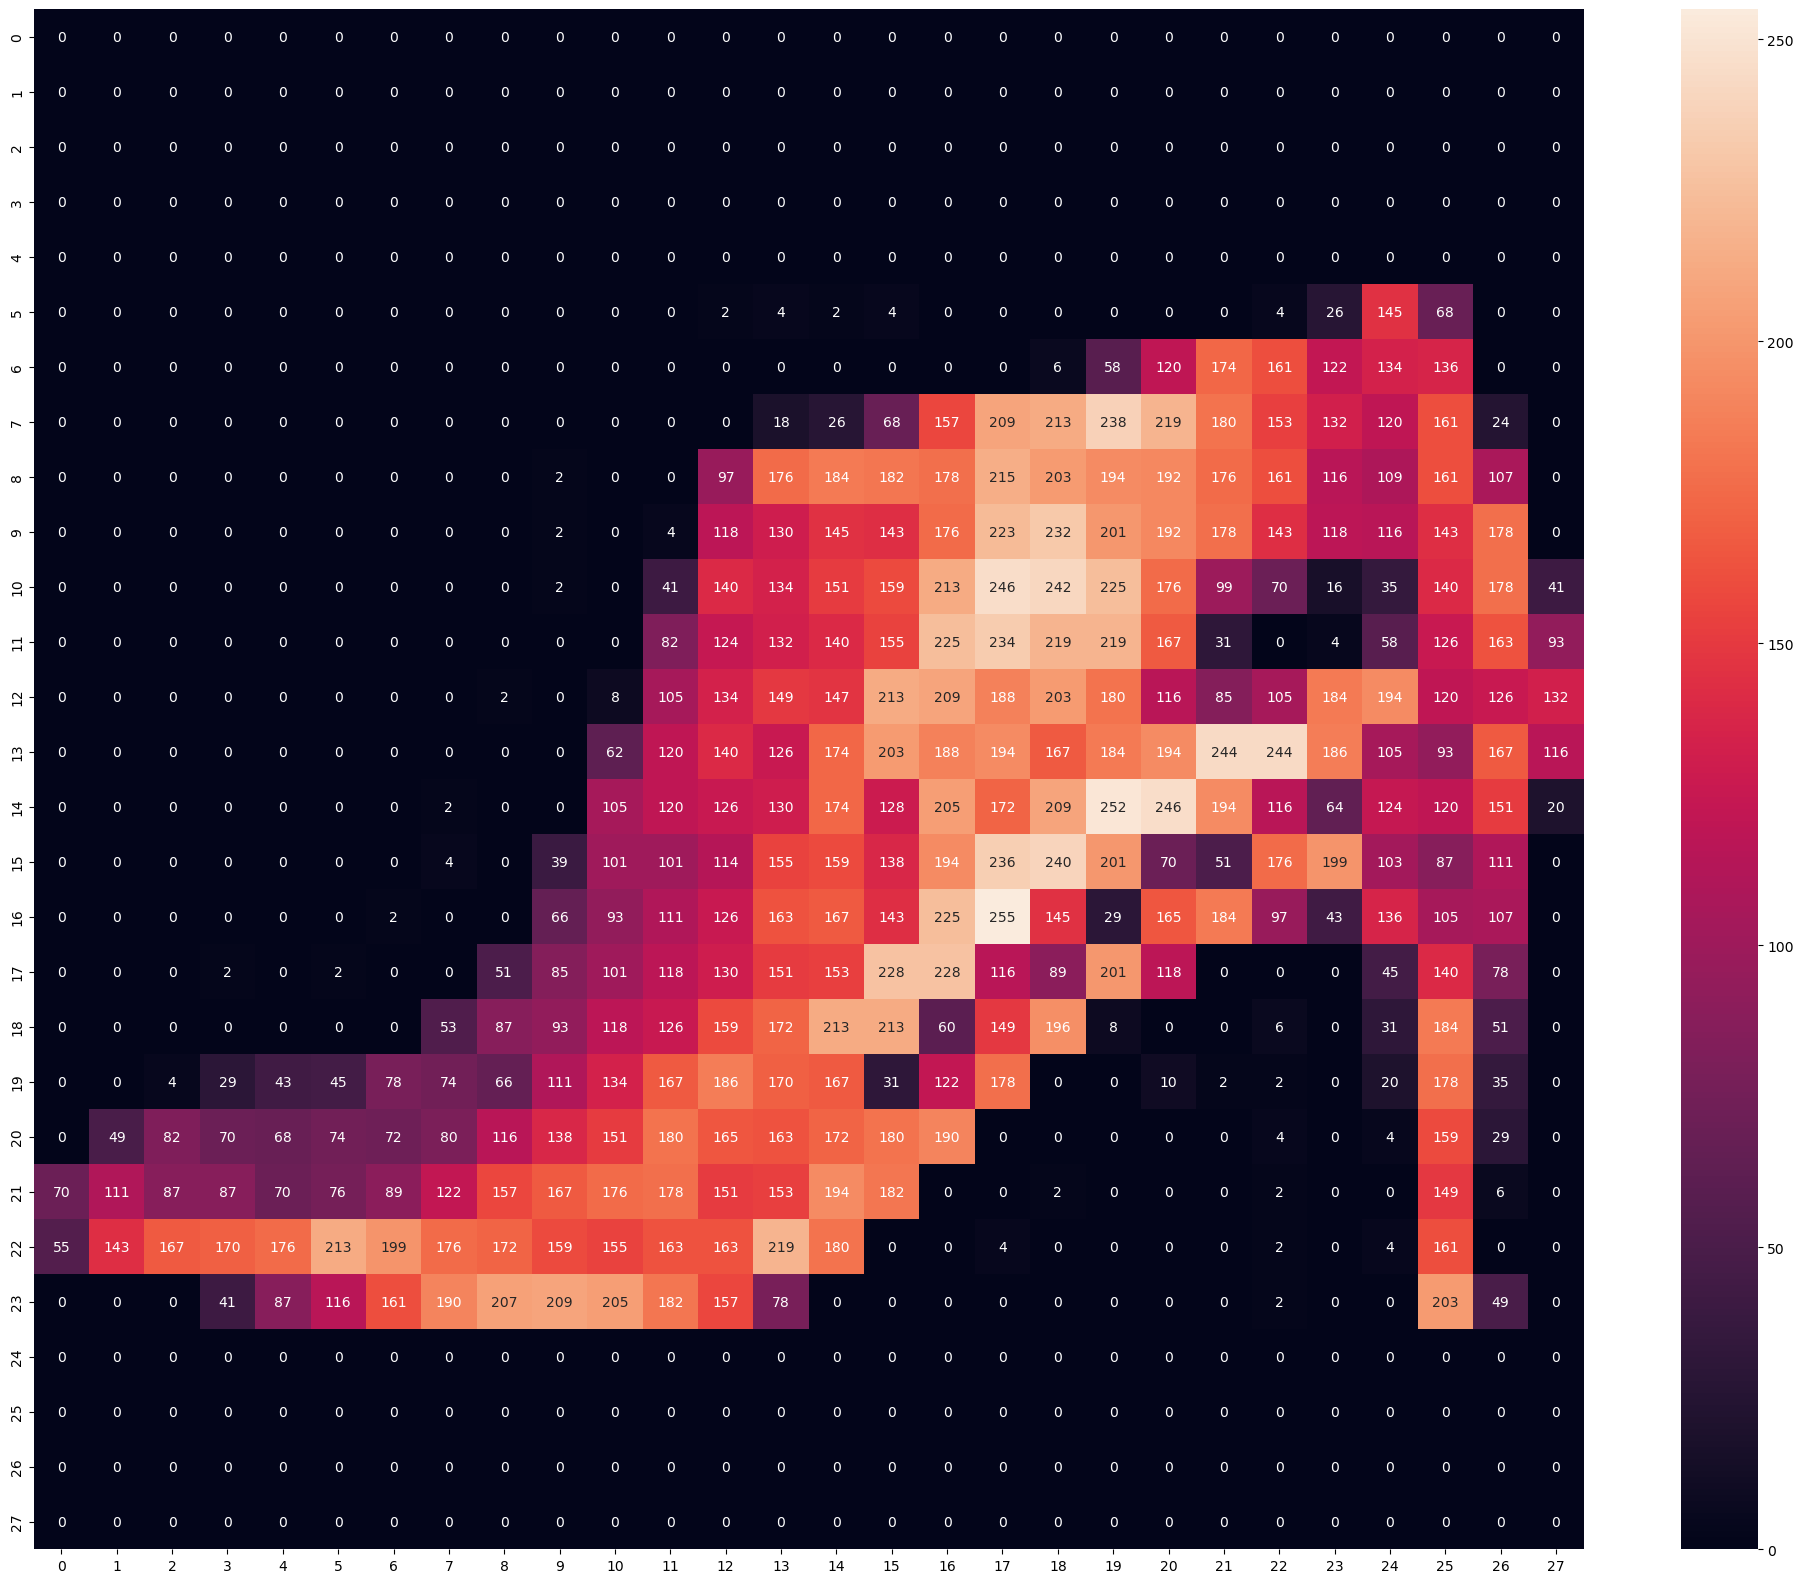

In [10]:
import seaborn as sns
plt.figure(figsize=(25, 20))
sns.heatmap(X_train[image_index], annot=True, fmt= '.3g')
plt.show()

In [11]:
X_train = np.expand_dims(X_train, axis = 3)
X_test = X_test.reshape(10_000, 28, 28, 1)

In [12]:
X_train = X_train / 255   #2^8 pixelvalue
X_test = X_test / 255

In [13]:
cnn = Sequential()

#features extraction
cnn.add(Conv2D(filters= 3, 
               kernel_size=(3,3), 
               strides= (1,1), #strides is steps
               activation= 'relu', 
               input_shape= (28, 28, 1)
              )
       ) 

cnn.add(Dropout(0.2))  #training ko time ma matra break huncha predit ko time ma hudaena
cnn.add(MaxPooling2D())


cnn.add(Conv2D(filters= 6, 
               kernel_size=(3,3), 
               strides= (1,1), #strides is steps
               activation= 'relu',
              )
       ) 

cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D())


cnn.add(Conv2D(filters= 12, 
               kernel_size=(3,3), 
               strides= (1,1), #strides is steps
               activation= 'relu',
              )
       ) 

cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters= 24, 
               kernel_size=(3,3), 
               strides= (1,1), #strides is steps
               activation= 'relu',
              )
       ) 

cnn.add(Dropout(0.2))
# results comes in multi dimensional numpy array called tensor and has to be converted into 1D 
cnn.add(Flatten())

cnn.add(Dense(units=64, activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Dense(units=10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', 
              optimizer= Adam(learning_rate=1e-4),
              metrics= ['accuracy'])



In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 3)         30        
                                                                 
 dropout (Dropout)           (None, 26, 26, 3)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 3)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 6)         168       
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 6)         0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 6)           0         
 g2D)                                                   

In [15]:
from keras.utils import to_categorical

In [16]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [18]:
es= EarlyStopping(monitor= 'val_loss', patience=5)
checkpoint= ModelCheckpoint(filepath= './fashion_mnist_checkpoint.h5',
                            save_best_only=True, 
                            save_weights_only=False
                           )

In [19]:
history= cnn.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          callbacks= [es, checkpoint], 
          epochs= 20
         )

Epoch 1/20
1875/1875 [==============================] - 16s 8ms/step - loss: 1.5023 - accuracy: 0.4439 - val_loss: 1.0399 - val_accuracy: 0.6468
Epoch 2/20
  13/1875 [..............................] - ETA: 15s - loss: 1.0993 - accuracy: 0.5529

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 15s 8ms/step - loss: 1.0263 - accuracy: 0.6071 - val_loss: 0.8841 - val_accuracy: 0.6948
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.9165 - accuracy: 0.6476 - val_loss: 0.8114 - val_accuracy: 0.7180
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.8569 - accuracy: 0.6673 - val_loss: 0.7645 - val_accuracy: 0.7262
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.8129 - accuracy: 0.6869 - val_loss: 0.7334 - val_accuracy: 0.7385
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7859 - accuracy: 0.6994 - val_loss: 0.7134 - val_accuracy: 0.7490
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7623 - accuracy: 0.7093 - val_loss: 0.6914 - val_accuracy: 0.7529
Epoch 8/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7438 - accuracy: 0.7193 - val_loss: 0.6848 - val_accuracy: 0.7

In [20]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
y_pred = y_pred.argmax(axis= 1)
y_test = y_test.argmax(axis= 1)

In [22]:
X = X_test * 255

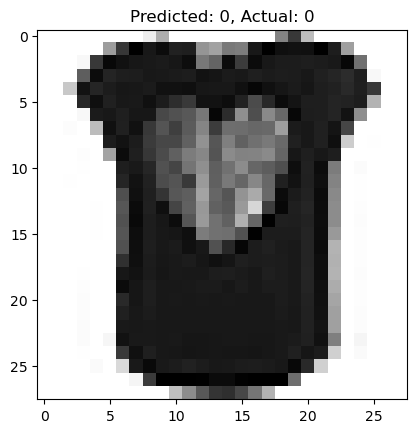

In [23]:
image_index = 4897
message = f'Predicted: {y_pred[image_index]}, Actual: {y_test[image_index]}'
plt.title(message)
plt.imshow(X_test[image_index], plt.cm.binary)
plt.show()